In [216]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
home_dir=os.path.join(r'Z:\balint\numt\Michael\data/')

In [3]:
numts=pd.read_csv(home_dir+'numt_master_array.csv')
numts.head()

,score,eg2_value,e_value,g_id,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence,g_up_flanking,g_down_flanking,"mt_up_flanking (if strand is negative, the coordinates are corrected)","mt_down_flanking (if strand is negative, the coordinates are corrected)",ensembl_gene_id,ensembl_description
0,17245,0.0,0.0,MT,0,0,17245,17245,+,+,17245,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,NaN,NaN,TACAAATTGTATAATATTTGGACTAAACCCCCTTTCCCACCCCAAG...,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,ENSOCUG00000029081,NaN
1,3398,0.0,0.0,1,114731432,6976,4680,4681,+,+,194850757,taGTAAAATTATTACATAACTTTGTCGAAGTTAATTTATAGGTTCA...,TAGTAAAACCATTACATAACTTTGTCGAAGTTAATTTATAGGTTCA...,ACAAAAGACTCTGAATAGCCAAAGCGATCCTGAACAAGAAAAATCA...,TATATATATTTATATATATATGTATATATGTACATATATATAACTA...,CCTTCGCCTCAAAACGAGAAGTAGAGACTATTGAACTAACAACCAC...,AACTGCTAATTCATGCTCCCATGTCTAACCCCATGGCTTTCTCAAC...,ENSOCUG00000006104,cilia and flagella associated protein 300 [Sou...
2,3120,0.0,0.0,GL019308,67160,883,4892,4945,+,+,88228,CAAGGCCATGAAGCATGCACACACTGCCCATCGCTCTCCTCAAACA...,CAAGGCCATGAAGCACGCACACACCGCCCGTCACCCTCCTCAAGTG...,GATAAACCCCGATAAACTTTACCACTCTTTGCCAACTCAGCCTCTA...,ATGAAGGGGCAAAGAGTAATTTTACAGTCGAGAGGGCTAGCAGTCA...,TACCGCCATCTTCAGCGAACCCTAAAAAGGAGCAAAAGTAAGCTCA...,TAGGGGCTATTAACTTTATTACAACTATTATTAATATGAAAGCCCC...,ENSOCUG00000031196,NaN
3,1888,0.0,0.0,GL019308,62527,12805,3439,3462,+,+,88228,AATTATTCATAGCCTCAATGATGAACAAGACATCCAAAAAACAGGA...,AATTATTCACAGCCTcaaTGATGAACAGGATATCCGAAAGATAGGC...,GTAGGAATTATATCCTTCCTCCTCATCGGCTGATGGCATGGCCAAG...,ACGTATACATGAGTTGTTCTTACATAATTGAATATACCTGCAATGC...,TGCCTAGGCGCAATCACTACCTTATTCACAGCCCTATGTGCCCTCA...,GTACACCCGTACGCACGCACGTACACCCGTACGCACGCACGTACAC...,ENSOCUG00000037635,NaN
4,1824,0.0,0.0,AAGW02081594,14016,6061,3040,3073,+,+,24576,TTCTTTGGACACCCTGAGGTATATATTCTTATCCTTCCAGGATTCG...,TTTTTCGGGCACCCCGAAGTATATATTCTTATTCTTCCAGGATTTG...,GACATGTCAAAGGAACGCAGAAGCCAGCTTGAAAAAGTCCTCAACA...,TGAAATAGCTATCACTATTCAGGTATGCCACTATTCTTCTAGGCAT...,ATATGAAAGCCCCTGCAATATCTCAATATCAAACCCCCTTATTCGT...,ATTCTCCTAGGTATCTATTTTACCCTACTTCAAGCATCGGAGTATT...,NaN,NaN


In [4]:
mt_annotation=pd.read_csv(home_dir+'mitos_annotation.bed',
                         sep='\t',
                         header=None,
                         index_col=0)
mt_annotation.columns=['start','end','name','sig','strand']
mt_annotation

,start,end,name,sig,strand
0,,,,,
MT,0,69,trnF(ttc),2.761000e-12,+
MT,69,1026,rrnS,1.600000e-61,+
MT,1026,1092,trnV(gta),1.117000e-10,+
MT,1090,2671,rrnL,1.190000e-38,+
MT,2671,2746,trnL2(tta),1.381000e-07,+
MT,2748,3699,nad1,2.354573e+08,+
MT,3703,3773,trnI(atc),7.147000e-13,+
MT,3770,3842,trnQ(caa),8.966000e-11,-
MT,3850,3919,trnM(atg),5.601000e-09,+


In [5]:
lengths=mt_annotation['end']-mt_annotation['start']
lengths.index=mt_annotation['name']
lengths

name
trnF(ttc)       69
rrnS           957
trnV(gta)       66
rrnL          1581
trnL2(tta)      75
nad1           951
trnI(atc)       70
trnQ(caa)       72
trnM(atg)       69
nad2          1038
trnW(tga)       67
trnA(gca)       67
trnN(aac)       73
trnC(tgc)       69
trnY(tac)       66
cox1          1536
trnS2(tca)      69
trnD(gac)       69
cox2           681
trnK(aaa)       69
atp8           195
atp6           675
cox3           783
trnG(gga)       70
nad3           345
trnR(cga)       67
nad4l          294
nad4          1368
trnH(cac)       69
trnS1(agc)      59
trnL1(cta)      70
nad5          1803
nad6           519
trnE(gaa)       68
cob           1134
trnT(aca)       66
trnP(cca)       66
dtype: int64

In [240]:
bajusz=lengths.apply(lambda value: lengths[lengths==value].index[0] if value>100 else '')
bajusz

name
trnF(ttc)          
rrnS           rrnS
trnV(gta)          
rrnL           rrnL
trnL2(tta)         
nad1           nad1
trnI(atc)          
trnQ(caa)          
trnM(atg)          
nad2           nad2
trnW(tga)          
trnA(gca)          
trnN(aac)          
trnC(tgc)          
trnY(tac)          
cox1           cox1
trnS2(tca)         
trnD(gac)          
cox2           cox2
trnK(aaa)          
atp8           atp8
atp6           atp6
cox3           cox3
trnG(gga)          
nad3           nad3
trnR(cga)          
nad4l         nad4l
nad4           nad4
trnH(cac)          
trnS1(agc)         
trnL1(cta)         
nad5           nad5
nad6           nad6
trnE(gaa)          
cob             cob
trnT(aca)          
trnP(cca)          
dtype: object

In [6]:
#get the cromosomes
chr_mask=numts['g_id'].apply(lambda g_id: len(g_id) < 3 and g_id!='MT')
chr_numts=numts[chr_mask]
chr_numts.head()

,score,eg2_value,e_value,g_id,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence,g_up_flanking,g_down_flanking,"mt_up_flanking (if strand is negative, the coordinates are corrected)","mt_down_flanking (if strand is negative, the coordinates are corrected)",ensembl_gene_id,ensembl_description
1,3398,0.000000e+00,0.000000e+00,1,114731432,6976,4680,4681,+,+,194850757,taGTAAAATTATTACATAACTTTGTCGAAGTTAATTTATAGGTTCA...,TAGTAAAACCATTACATAACTTTGTCGAAGTTAATTTATAGGTTCA...,ACAAAAGACTCTGAATAGCCAAAGCGATCCTGAACAAGAAAAATCA...,TATATATATTTATATATATATGTATATATGTACATATATATAACTA...,CCTTCGCCTCAAAACGAGAAGTAGAGACTATTGAACTAACAACCAC...,AACTGCTAATTCATGCTCCCATGTCTAACCCCATGGCTTTCTCAAC...,ENSOCUG00000006104,cilia and flagella associated protein 300 [Sou...
18,457,9.900000e-201,1.700000e-204,18,17579665,9758,1440,1483,+,+,69800736,TAGCACTAATCTTAATTTCCATTCTAGCTGTGTGCTTAGCTTATGA...,TAGCACTTATGTTAATCTCAATCTTAGCCCTTGGATTAGCCTACGA...,CCAGGTGCTTCTCCTGGTCTCCCATGGGGTGCAGGGCCCAAGCACT...,AAGGTGTTACCACTAACAACAACATATGTTGACTGCGAGCAACTAG...,ACTCCCTCAATTAAATATCTATTCAGAAAAATCAAGCCCTTATGAA...,GACTATTCTTCCACTAATAGCAGCATGATGACTAGTTGCTAGCCTT...,NaN,NaN
20,348,7.600000e-149,1.300000e-152,9,78086277,13328,720,732,+,+,116251907,TTCAACTTCTCTAACCTCTTAGGATTTTTCCCTACAACAATACACC...,TTTAACTTCTCAAACATACTAGGGTTCTTTCCAATGACAATTCATC...,CAAGGTGATCAATGCCTGGGTGTTAGCCCTTAGAGGGTGCAGTGGT...,AGCTACAAATATAACATTTTTATTTATTTATTTATTTTAGAGTTAT...,CTATTAAACGCCTTGCACTAGGAAGCATTTTTGCAGGATTCTTAAT...,CCATCACAAACATTACACTTAATAAAAACACTACGTATGTCATAGT...,ENSOCUG00000000711,KIAA1328 [Source:HGNC Symbol;Acc:HGNC:29248]
23,267,2.700000e-110,4.800000e-114,12,96965407,17061,419,402,+,+,155355395,TTGGGACTAaacccccctttccccacccccaaaGTCAGGACAGCTC...,TTTGGACTAAACCCCCTTTCCCACCCC----AAGTCAG-ACAGCTC...,CAAATGGATAGATTAAAAAAAAACTAAACTTCAAAAGATGCCAGAA...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,TTTTCCTTTTAACAGGTTTAACTCAATTAAATACAAATTGTATAAT...,ACCACACCCCCAAGGGATACAGCAGTGATAAATATTTAGCAATGAA...,ENSOCUG00000011814,sestrin 1 [Source:HGNC Symbol;Acc:HGNC:21595]
25,248,3.000000e-101,5.300000e-105,17,53752087,10520,595,597,+,+,85008467,CATTTTCAGCCACCGAATTAATCATAGTTTATATCTTATTCGAAGC...,CATTTTCAGCCACAGAATTTATCCTGTTTTATATTCTATTTGAAGC...,AAAATAGCTAAGGGCAGAGAGTAGAGCTTCCACTTAGCAGTTGAGA...,CATCTTAAAAGCCACAGGCAGATCGTGTAATACTGATTTAGAGAGG...,TAATCAGCCAAGTGACACCAACCTAAACTTCTCAACCACATTTTTT...,GCTTTATAGGCGCCACCGCTCTAATAATCGCACATGGCCTTACTTC...,NaN,NaN


In [7]:
color_dict={
    '0':'#ffffff',#white
'1':'#f97306',#orange
 '11':'#00ffff',#cyan
 '12':'#653700',#brown
 '13':'#0504aa',#royal blue
 '14':'#677a04',#olive green
 '15':'#9a0eea',#violet
 '16':'#fe01b1',#bright pink
 '17':'#0485d1',#cerulean
 '18':'#ff000d',#bright red
 '19':'#e17701',#pumpkin
 '2':'#82cafc',#sky
 '20':'#fdff52',#lemon
 '21':'#feffca',#ecru
 '3':'#c071fe',#easter purple
 '4':'#000435',#dark navy
 '7':'#bccb7a',#greenish tan
 '9':'#fdb915'#orangey yellow
           }

In [116]:
g_ids=list(chr_numts['g_id'])
mt_starts=list(chr_numts['mt_start'])
mt_lengths=list(chr_numts['mt_length'])
tracks=[]
for g_id, mt_start, mt_length in zip(g_ids, mt_starts, mt_lengths):
    mt_end=mt_start+mt_length
    if int(mt_end)>17245:
        pass
    else:
        tracks.append(g_id+','+str(mt_start)+','+str(mt_length)+','+str(mt_end))

In [125]:
tracks=pd.Series(tracks)
tracks.index=tracks.apply(lambda element: element.split(',')[1])
tracks=list(tracks.sort_index())
tracks

['12,0,218,218',
 '1,10447,697,11144',
 '15,10447,533,10980',
 '17,10520,597,11117',
 '20,1070,478,1548',
 '19,10810,963,11773',
 '2,10943,326,11269',
 '9,10988,826,11814',
 '15,11679,507,12186',
 '3,11813,224,12037',
 '7,12010,298,12308',
 '7,12473,363,12836',
 '1,1299,486,1785',
 '2,13115,271,13386',
 '9,13328,732,14060',
 '9,13377,400,13777',
 '14,13855,477,14332',
 '17,13871,408,14279',
 '1,14020,1032,15052',
 '9,14066,272,14338',
 '4,15725,682,16407',
 '21,15954,320,16274',
 '20,1681,616,2297',
 '13,2231,354,2585',
 '15,2372,431,2803',
 '1,2418,807,3225',
 '1,2459,402,2861',
 '4,3675,207,3882',
 '4,3810,1214,5024',
 '1,428,369,797',
 '4,4594,1523,6117',
 '18,4594,509,5103',
 '15,5472,689,6161',
 '11,5570,865,6435',
 '13,5929,126,6055',
 '1,6082,716,6798',
 '15,6261,932,7193',
 '7,6969,519,7488',
 '1,6976,4681,11657',
 '4,7012,1706,8718',
 '1,7279,388,7667',
 '17,7384,355,7739',
 '16,8861,163,9024',
 '4,9056,1967,11023',
 '12,9483,385,9868',
 '18,9484,296,9780',
 '18,9600,416,10016

In [149]:
sets=pd.Series(tracks).apply(lambda element: set(np.arange(int(element.split(',')[1]), int(element.split(',')[3]))))
sets.index=tracks
sets

12,0,218,218          {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
1,10447,697,11144     {10447, 10448, 10449, 10450, 10451, 10452, 104...
15,10447,533,10980    {10447, 10448, 10449, 10450, 10451, 10452, 104...
17,10520,597,11117    {10520, 10521, 10522, 10523, 10524, 10525, 105...
20,1070,478,1548      {1070, 1071, 1072, 1073, 1074, 1075, 1076, 107...
19,10810,963,11773    {10810, 10811, 10812, 10813, 10814, 10815, 108...
2,10943,326,11269     {10943, 10944, 10945, 10946, 10947, 10948, 109...
9,10988,826,11814     {10988, 10989, 10990, 10991, 10992, 10993, 109...
15,11679,507,12186    {11679, 11680, 11681, 11682, 11683, 11684, 116...
3,11813,224,12037     {11813, 11814, 11815, 11816, 11817, 11818, 118...
7,12010,298,12308     {12288, 12289, 12290, 12291, 12292, 12293, 122...
7,12473,363,12836     {12473, 12474, 12475, 12476, 12477, 12478, 124...
1,1299,486,1785       {1299, 1300, 1301, 1302, 1303, 1304, 1305, 130...
2,13115,271,13386     {13312, 13313, 13314, 13315, 13316, 13317,

In [182]:
proba=[]
counter=0
filtered_tracks=pd.Series(index=tracks)
for index, track in enumerate(tracks):
    indicator=[]
    filtered_track=[]
    if track not in filtered_track:
        filtered_track.append(track)
    for number in np.arange(0,len(tracks)):
        if (len(sets[track]&sets[tracks[number]]))==0 and len(set(indicator)&sets[tracks[number]])==0 and (
        tracks[number] not in proba) and track not in proba:
            indicator+=list(sets[tracks[number]])
            proba.append(tracks[number])
            counter+=1
            filtered_track.append(tracks[number])
    indicator+=list(track)
    proba.append(track)
    if len(filtered_track)>1:
        filtered_track=pd.Series(filtered_track)
        filtered_track.index=filtered_track.apply(lambda element: int(element.split(',')[1]))
        filtered_track=list(filtered_track.sort_index(ascending=True))
        filtered_tracks[track]=filtered_track

C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [183]:
filtered_tracks=filtered_tracks.dropna()

In [185]:
filtered_tracks

12,0,218,218          [12,0,218,218, 1,428,369,797, 20,1070,478,1548...
15,10447,533,10980    [1,1299,486,1785, 13,2231,354,2585, 4,3810,121...
17,10520,597,11117    [1,2418,807,3225, 18,4594,509,5103, 11,5570,86...
19,10810,963,11773    [1,2459,402,2861, 13,5929,126,6055, 1,6082,716...
dtype: object

In [190]:
sum(filtered_tracks.apply(lambda element_list: len(element_list)))

44

In [201]:
def add_blanks(element_list):
    element_list=pd.Series(element_list)
    element_list.index=element_list.apply(lambda element: int(element.split(',')[1]))
    element_list=list(element_list.sort_index(ascending=True))
    blank_id='0'
    blanks=[]
    blanks+=element_list
    if int(element_list[0].split(',')[1])==0:
        blanks.append(blank_id+','+str((int(element_list[-1].split(',')[1]))+
                          (int(element_list[-1].split(',')[2])+1))+','+
                         str(17245-((int(element_list[-1].split(',')[1]))+
                          (int(element_list[-1].split(',')[2])))))#right hand blank
        for index, element in enumerate(element_list):
            if index!=0 and element!=element_list[-1]:
                start=int(element.split(',')[1])
                length=int(element.split(',')[2])
                end=start+length
                prev_start=int(element_list[index-1].split(',')[1])
                prev_length=int(element_list[index-1].split(',')[2])
                prev_end=prev_start+prev_length
                
                next_start=int(element_list[index+1].split(',')[1])
                next_length=int(element_list[index+1].split(',')[2])
                next_end=next_start+next_length
                blanks.append(blank_id+','+
                              str(prev_end)+','+
                             str(start-prev_end-1))
                blanks.append(blank_id+','+
                             str(end)+','+
                             str(next_start-end-1))
    else:
        blanks.append(blank_id+','+'0'+','+str(int(element_list[0].split(',')[1])-1))#left hand blank
        blanks.append(blank_id+','+str((int(element_list[-1].split(',')[1]))+
                          (int(element_list[-1].split(',')[2])+1))+','+
                         str(17245-((int(element_list[-1].split(',')[1]))+
                          (int(element_list[-1].split(',')[2])))))#right hand blank
        for index, element in enumerate(element_list):
            if index!=0 and element!=element_list[-1]:
                start=int(element.split(',')[1])
                length=int(element.split(',')[2])
                end=start+length
                prev_start=int(element_list[index-1].split(',')[1])
                prev_length=int(element_list[index-1].split(',')[2])
                prev_end=prev_start+prev_length
                
                next_start=int(element_list[index+1].split(',')[1])
                next_length=int(element_list[index+1].split(',')[2])
                next_end=next_start+next_length
                blanks.append(blank_id+','+
                              str(prev_end)+','+
                             str(start-prev_end-1))
                blanks.append(blank_id+','+
                             str(end)+','+
                             str(next_start-end-1))
    blanks=pd.Series(blanks)
    blanks.index=blanks.apply(lambda element: int(element.split(',')[1]))
    blanks=list(blanks.sort_index(ascending=True).drop_duplicates())
    return blanks

In [202]:
blanked_tracks=filtered_tracks.apply(add_blanks)

In [203]:
blanked_tracks

12,0,218,218          [12,0,218,218, 0,218,209, 1,428,369,797, 0,797...
15,10447,533,10980    [0,0,1298, 1,1299,486,1785, 0,1785,445, 13,223...
17,10520,597,11117    [0,0,2417, 1,2418,807,3225, 0,3225,1368, 18,45...
19,10810,963,11773    [0,0,2458, 1,2459,402,2861, 0,2861,3067, 13,59...
dtype: object

In [363]:
def merge_tracks(element_list):
    global merged
    merged+=element_list
merged=[]
blanked_tracks.apply(merge_tracks)
missing_tracks=list(set(tracks)-(set(tracks)&set(merged)))
missing_tracks

['18,9758,1483,11241',
 '2,10943,326,11269',
 '1,6976,4681,11657',
 '4,9056,1967,11023']

[None]

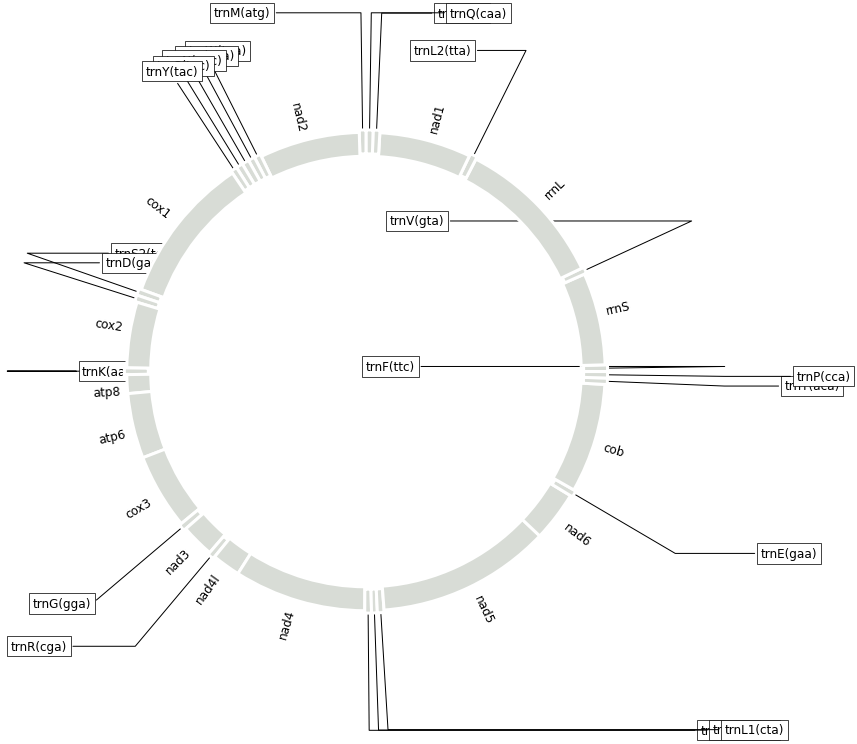

In [299]:
explodes=lengths.apply(lambda length: 0.01 if length<150 else 0.0)
fig, ax = plt.subplots(figsize=(11, 11))
wedges, texts = ax.pie(lengths, wedgeprops=dict(width=0.1, linewidth=3, edgecolor='w'), startangle=0,
                       labels=bajusz, labeldistance=1.025,
                       rotatelabels=True, colors=len(lengths)*['#d8dcd6'],
                      explode=explodes)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
for index, wedge in enumerate(wedges):
    if list(lengths)[index]<100:
        angle = ((wedge.theta2 - wedge.theta1))/2. + wedge.theta1
        y = np.sin(np.deg2rad(angle))
        x = np.cos(np.deg2rad(angle))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(angle)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(lengths.index.values[index], xy=(x, y), xytext=(index/20*np.sign(x+0.01), 1.5*y),
                        horizontalalignment=horizontalalignment, **kw)
        
plt.rc('font', size=12)
ax.set(aspect='equal')

In [304]:
for index, wedge in enumerate(wedges):
    if list(lengths)[index]<100:
        angle = ((wedge.theta2 - wedge.theta1))/2. + wedge.theta1
        y = np.sin(np.deg2rad(angle))
        x = np.cos(np.deg2rad(angle))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(angle)
        print(horizontalalignment)

left
left
left
left
left
right
right
right
right
right
right
right
right
right
right
right
left
left
left
left
left
left


In [350]:
def visualize_numts(element_list):
    global counter
    size=0.1
    colors=[]
    lengths=[]
    startangle=int(element_list[0].split(',')[1])*(360/17245)
    for index, part in enumerate(element_list):
        colors.append(color_dict[part.split(',')[0]])
        length=int(part.split(',')[2])
        lengths.append(length)
        if index==0:
            startangle=int(part.split(',')[1])*(360/17245)
    ax.pie(lengths, radius=0.95-(counter*size), colors=colors,
       wedgeprops=dict(width=size, edgecolor='orange'), startangle=startangle)
    counter+=1

In [352]:
custom_lines = [Line2D([1], [0], color=color_dict['1'], lw=4),
                Line2D([0], [0], color=color_dict['2'], lw=4),
                Line2D([0], [0], color=color_dict['3'], lw=4),
               Line2D([0], [0], color=color_dict['4'], lw=4),
               Line2D([0], [0], color=color_dict['7'], lw=4),
               Line2D([0], [0], color=color_dict['9'], lw=4),
               Line2D([0], [0], color=color_dict['11'], lw=4),
               Line2D([0], [0], color=color_dict['12'], lw=4),
               Line2D([0], [0], color=color_dict['13'], lw=4),
               Line2D([0], [0], color=color_dict['14'], lw=4),
               Line2D([0], [0], color=color_dict['15'], lw=4),
               Line2D([0], [0], color=color_dict['16'], lw=4),
               Line2D([0], [0], color=color_dict['17'], lw=4),
               Line2D([0], [0], color=color_dict['18'], lw=4),
               Line2D([0], [0], color=color_dict['19'], lw=4),
               Line2D([0], [0], color=color_dict['20'], lw=4),
               Line2D([0], [0], color=color_dict['21'], lw=4)]

In [381]:
missing_tracks

['18,9758,1483,11241',
 '2,10943,326,11269',
 '1,6976,4681,11657',
 '4,9056,1967,11023']

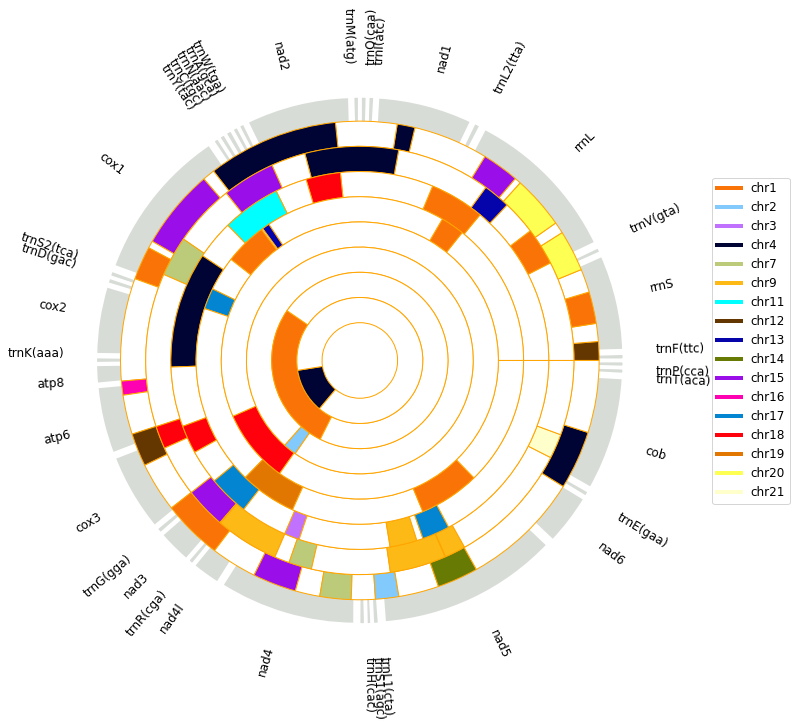

In [384]:
counter=0
explodes=len(lengths)*[0.05]
fig, ax = plt.subplots(figsize=(11, 11))
wedges, texts = ax.pie(lengths, wedgeprops=dict(width=0.15, linewidth=3.5, edgecolor='w'), startangle=0,
                       labels=lengths.index.values, labeldistance=1.125,
                       rotatelabels=True, colors=len(lengths)*['#d8dcd6'],
                      explode=explodes)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
ax.legend(custom_lines, ['chr1', 'chr2', 'chr3', 'chr4', 'chr7', 'chr9', 'chr11', 'chr12', 'chr13',
                        'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21'],
         bbox_to_anchor=(1.05, 0.8))
blanked_tracks.apply(visualize_numts)
plt.rc('font', size=12)
ax.set(aspect='equal')
plt.tight_layout()
missing_counter=4
for index, track in enumerate(missing_tracks):
    size=0.1
    colors=[color_dict[track.split(',')[0]],'#ffffff']
    numt_length=int(track.split(',')[2])
    blank_length=17245-numt_length
    startangle=int(track.split(',')[1])*(360/17245)
    ax.pie([numt_length, blank_length], radius=0.95-(missing_counter*size), colors=colors,
          wedgeprops=dict(width=size, edgecolor='orange'), startangle=startangle)
    missing_counter+=1
plt.savefig('../../results/modified_mt_proba.png')
